## Python による数値データの読み込み及Fitting
#### 自分用なので雑なところはありますが、実際の数値データを読み込みFittingまでの例があまりHitしないので書いてみました。
#### (ここでは軸の設定などは本質ではないので大幅に省いてあります。悪しからず)

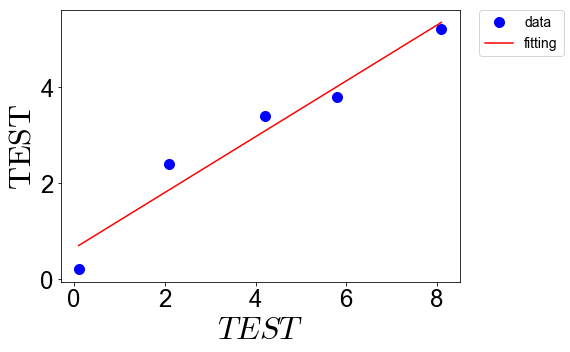

(0.5810963694333023, 0.6407487401007927)

In [2]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
npArraydata = np.loadtxt("./data.txt", comments='!', unpack=True)
plt.rcParams["font.family"] = "arial"       
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 18 
plt.rcParams["mathtext.cal"] = "serif"  
plt.rcParams["mathtext.rm"] = "serif" 
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"  
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["legend.loc"] = "best"
x = npArraydata[0, ]
y = npArraydata[1, ]
fig = plt.figure(figsize=(7.15, 5))
ax = fig.add_subplot(111)
plt.tick_params(labelsize=24)
ax.plot(x, y,  label="data", marker="o", ms=10 , color='blue', linestyle='None')
def reg1dim(x, y):
    n = len(x)
    a = ((np.dot(x, y)- y.sum() * x.sum()/n)/
        ((x ** 2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum())/n
    return a, b
a, b = reg1dim(x, y)
ax.set_ylabel('$\mathrm{TEST}$', fontsize=32)
ax.set_xlabel('$TEST$', fontsize=32)
ax.plot([x.min(), x.max()], [a * x.min() + b, a * x.max() + b], color="r",  label="fitting")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
fig.savefig('plot.png', bbox_inches='tight')
plt.show()
a, b

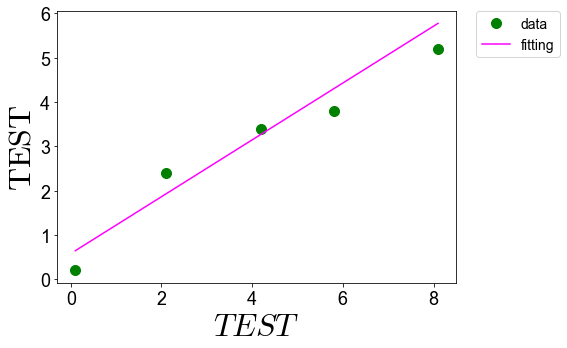

In [5]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
npArraydata = np.loadtxt("./data.txt", comments='!', unpack=True)
#f=open('data.txt','rt')
plt.rcParams["font.family"] = "arial"       
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 18 
plt.rcParams["mathtext.cal"] = "serif"  
plt.rcParams["mathtext.rm"] = "serif" 
plt.rcParams["mathtext.it"] = "serif:italic"
plt.rcParams["mathtext.bf"] = "serif:bold"  
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["legend.loc"] = "best"
fig = plt.figure(figsize=(7.15, 5))
ax = fig.add_subplot(111)
data1 = npArraydata[0, ]
data2 = npArraydata[1, ]
list_x= data1.tolist()
list_y= data2.tolist()
array_x = np.array(list_x)
array_y = np.array(list_y)
ax.plot(list_x, list_y,  label="data", marker="o", ms=10 , color='green', linestyle='None')
def fit_1st(x,a, b):
    return a*x + b
param, cov=curve_fit(fit_1st,array_x,array_y)
list_y_fit=[]
for num in array_x:
    list_y_fit.append(param[0] + num * param[1] )
array_y_fit=np.array(list_y_fit)
ax.set_ylabel('$\mathrm{TEST}$', fontsize=32)
ax.set_xlabel('$TEST$', fontsize=32)
ax.plot(array_x, array_y_fit, marker="", color="magenta", label="fitting")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
fig.savefig('plot.png', bbox_inches='tight')
plt.show()